<a href="https://colab.research.google.com/github/lorek/ZPS2020/blob/main/docs/z6_Feature_Selection_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.feature_selection import f_classif, SelectKBest
from pylab import plot, show, figure

# **ANOVA (ANOVA-F, One-Way ANOVA)**

Spis treści:

1. Feature Selection - Metody filtrujące
2. Działanie ANOVA
* Wykorzystanie w machine learning - intuicja
* ANOVA i test F
3. Funkcja sklearn.feature_selection.f_classif()


---


> #### 1. ANOVA w Feature Selection 

Przypomnienie: Feature Selection to sposób zmniejszania rozmiaru zbioru danych, poprzez pozbycie się zmiennych, które zawierają zbędne lub nieistotne cechy - nie tworzy nowych zmiennych tylko wybiera podzbiór danych zmiennych. Feature Selection dzieli się głównie na metody opakowujące, metody osadzone i metody filtrujące - do tych ostatnich należy ANOVA. Metody Filtrujące polegają na wyborze najlepszych zmiennych, na podstawie ich wyników w różnych testach statystycznych pod kątem ich korelacji ze zmienną wynikową.
Nazwa ANOVA pochodzi od “ANalisys Of VAriance” i używa się jej do przeprowadzania testu hipotez statystycznych służących do określenia, czy średnie z dwóch lub więcej próbek danych pochodzą z tego samego rozkładu. Są różne rodzaje tego testu zależnie od ilości zmiennych, podstawowe to One-Way Anova (do badania gdy mamy jedną zmienną poza zmienną docelową) oraz Two-Way ANOVA (używane gdy oprócz zmiennej docelowej mamy dwie zmienne).
ANOVA używana jest gdy mamy do czynienia z danymi numerycznymi oraz kategoryczną zmienną docelową (która określa klasy), należy również sprawdzić czy residua mają rozkład normalny, a zmienne powinny być niezależne.
ANOVA zakłada liniową zależność między cechą a celem oraz że zmienne mają rozkład Gaussa. Jeśli tak nie jest, wynik tego testu może nie być przydatny.


> #### 2. Działanie ANOVA

> * **Wykorzystanie w machine learningu - intuicja**

W zagadnieniu Feature Selection wykorzystujemy One-Way ANOVA czyli wykorzystujemy ten test jako jednowymiarowy - badamy naraz wpływ jednej zmiennej na zmienną docelową.
Powiedzmy, że mamy dwie klasy punktów (niebieskie i czerwone) oraz dwie zmienne x i y i chcemy znaleźć pewien “wskaźnik” który powie nam, która zmienna lepiej rozróżnia dwie klasy.
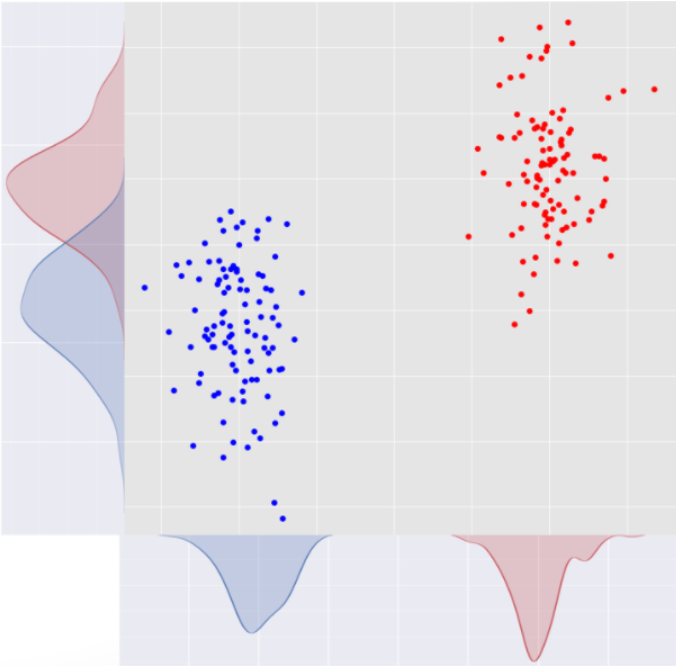
Widać, że x jest lepszym separatorem niż y, ponieważ jeśli rzutujemy dane na oś x, otrzymujemy dwie całkowicie oddzielne klasy, ale jeśli rzutujemy dane na y, dwie klasy nakładają się na środku osi. Co sprawia, że z jest lepsze niż y?
Patrząc na x, dwie klasy są od siebie oddalone. Tzn. odległość między średnimi rozkładów klas jest większy na x niż na y.
Według zmiennej x klasy są bardziej zwarte, więc jest bardziej prawdopodobne, że nie będą się pokrywać z inną klasą. Tzn. wariancja każdej klasy jest mniejsza według x niż według y.
Możemy zauważyć, że wartość (odległość między klasami)/(zwartość klass) jest dobrym wyznacznikiem, mówiącym które zmienne są lepsze - oczywiście należy zachować cechy wyjaśniające największą część zmienności.
Podobnym wyznacznikiem jest Statystyka F używana w ANOVA - porównamy zmienność międzygrupową ze zmiennością wewnątrzgrupową.


> * **ANOVA i test F** 

Statystyka F lub test F to klasa testów statystycznych, które obliczają stosunek między wartościami wariancji, takimi jak wariancja wyjaśniona i niewyjaśniona za pomocą testu statystycznego, takiego jak ANOVA. ANOVA wykorzystuje test F do sprawdzenia, czy istnieje jakakolwiek znacząca różnica między grupami. Jak przeprowadzić taki test?

**a) Definiujemy hipotezy**

W teście ANOVA hipotezy są postaci:

H_0: Wszystkie grupy są jednakowe (mają tę samą średnią/wariancję)

H_A: Grupy różnią się między sobą (przynajmniej jedna odstaje)

**b) Liczymy Sumę kwadratów (Sum of Squares, SS)**

Suma kwadratów jest techniką statystyczną używaną do określenia rozproszenia punktów danych. Jest to miara odchylenia i można ją zapisać jako SS=Σ(x_i - av)^2, gdzie x_i to i-ty element zbioru, a av to średnia tych elementów
> SSB (Sum of Squares Between the groups)

Suma kwadratów odległości między średnią wartością każdej grupy, a średnią wszystkich zmiennych (g)

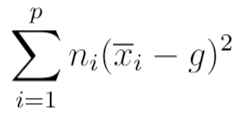

> SSW (Sum of Squares Within the groups)

Suma kwadratów odległości między każdą obserwacją w grupie, a średnią grupy (ale mamy więcej grup więc dodajemy tę wartość dla każdej grupy)

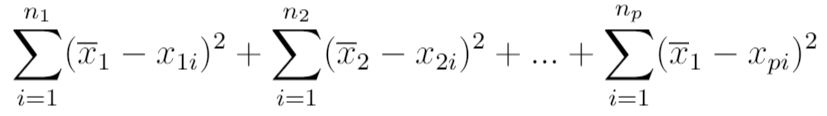

**c) Określamy liczbę stopni swobody**

Stopnie swobody odpowiadają maksymalnej liczbie zmiennych niezależnych. Liczymy więc: dfB=p-1, dfW=(n1-1)+(n2-1)+...+(np-1)=N-p (N to wszystkie obserwacje, a p to ilość grup (klas)).

**d) Liczymy statystykę F**

Statystyka F jest to “miara”, na podstawie której można wnioskować, czy średnie różnych próbek są statystycznie istotnie różne czy nie. Jest ona dana wzorem F=(SSB/dfB)/(SSW/dfW) - tak jak chcieliśmy, określa ona stosunek zmienności między grupami do zmienności wewnątrz grup.

**e) Sprawdzamy hipotezy**

Aby sprawdzić czy należy odrzucić hipotezę zerową, musimy policzyć jeszcze wartość krytyczną F tzn. kwantyl z rokładu Fishera-Snedecora z p-1 i N-p stopniami swobody oraz na poziomie istotności alfa (poziom istotności to przyjęte przez nas dopuszczalne ryzyko tego, że odrzucimy hipotezę zerową, gdy jest prawdziwa) - jeżeli nasza policzona statystyka F jest większa od wartości krytycznej oznacza to, że należy odrzucić hipotezę zerową. Odrzucenie hipotezy zerowej oznacza, że między grupami istnieje różnica, tzn zmienna ma wpływ na wynik, zatem chcemy pozostawić tą zmienną w naszym zbiorze. 
Im wyższa statystyka F tym bardziej istotna jest zmienna.

> #### 3. Funkcja sklearn.feature_selection.f_classif() i przykłady

W Pythonie dostępna jest funkcja f_classif() z pakieru sklearn, która z pomocą funkcji SelectKBest() może służyć do wybrania k najlepszych (najistotniejszych) zmiennych w metodzie Feature Selection. 
Porównujemy każdą zmienną do zmiennej docelowej, aby zobaczyć czy istnieje między nimi istotna statystycznie zależność (analiza wariancji). Naraz sprawdzamy tylko jedną zmienną ze zmienną zależną, dlatego nazywamy tę metodę jednowymiarową. Dla każdej zmiennej f_classif() oblicza wartość statystyki F i SelectKBest() wybiera k zmiennych, dla których ta wartość była najwyższa.







* IRIS

Klasy: 3

Ilość obserwacji: 150

Wymiar: 4

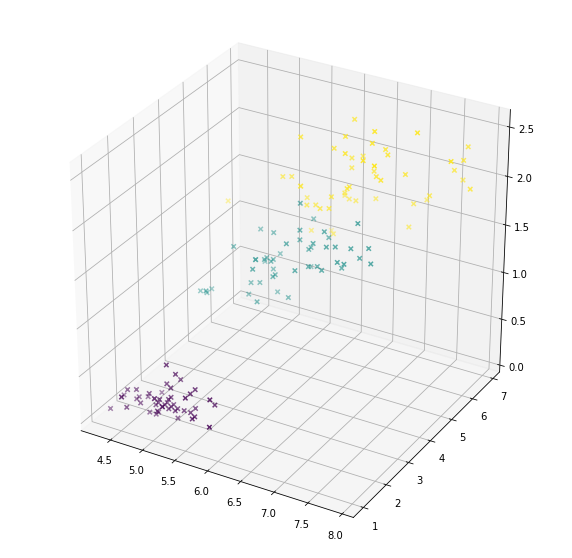

In [ ]:
x,y = datasets.load_iris(return_X_y=True)

fs = SelectKBest(score_func=f_classif, k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
show()

* BREAST_CANCER

Klasy: 2

Ilość obserwacji: 569

Wymiar: 30

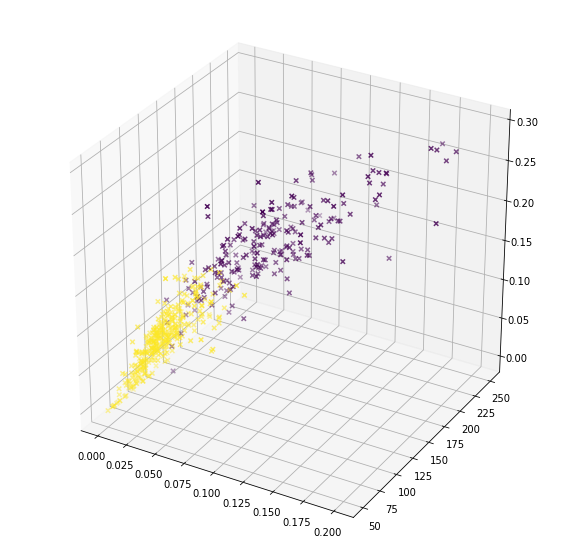

In [ ]:
x,y = datasets.load_breast_cancer(return_X_y=True)

fs = SelectKBest(score_func=f_classif, k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
show()

źródło obrazka: https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w